In [10]:
import pandas as pd

# Excel dosyasının yolunu belirtin
file_path = r'C:\Users\ilayd\OneDrive\Masaüstü\DataBase.xlsx'

# Excel dosyasındaki tüm sayfaları oku
excel_data = pd.read_excel(file_path, sheet_name=None)

# Sayfaların isimlerini yazdır
print(excel_data.keys())

# Her bir sayfayı ayrı bir DataFrame olarak işleyin
for sheet_name, df in excel_data.items():
    print(f"Sayfa Adı: {sheet_name}")
    print(df.head())  # İlk 5 satırı yazdır

dict_keys(['Tüm müşterilerin toplam harcama', 'En çok satan ürünler', 'Her çalışanın işleme aldığı top', 'Tedarikçiler tarafından alınan '])
Sayfa Adı: Tüm müşterilerin toplam harcama
  CustomerID                   CompanyName  TotalSpending
0      QUICK                    QUICK-Stop      117483.39
1      SAVEA            Save-a-lot Markets      115673.39
2      ERNSH                  Ernst Handel      113236.68
3      HUNGO  Hungry Owl All-Night Grocers       57317.39
4      RATTC    Rattlesnake Canyon Grocery       52245.90
Sayfa Adı: En çok satan ürünler
   ProductID             ProductName  TotalQuantitySold
0         60       Camembert Pierrot               1577
1         59    Raclette Courdavault               1496
2         31       Gorgonzola Telino               1397
3         56  Gnocchi di nonna Alice               1263
4         16                 Pavlova               1158
Sayfa Adı: Her çalışanın işleme aldığı top
   EmployeeID       EmployeeName  TotalOrders  TotalSales

In [26]:
# Ürünleri satış miktarına göre sıralama
sorted_df = df.sort_values(by='TotalQuantitySold', ascending=False)
print(sorted_df)

    SupplierID             SupplierName  ProductID                ProductName  \
0           28             Gai pâturage         60          Camembert Pierrot   
1           28             Gai pâturage         59       Raclette Courdavault   
2           14  Formaggi Fortini s.r.l.         31          Gorgonzola Telino   
3           26     Pasta Buttini s.r.l.         56     Gnocchi di nonna Alice   
4            7            Pavlova, Ltd.         16                    Pavlova   
..         ...                      ...        ...                        ...   
72          16        Bigfoot Breweries         67  Laughing Lumberjack Lager   
73          22      Zaanse Snoepfabriek         48                  Chocolade   
74          17        Svensk Sjöföda AB         37                 Gravad lax   
75           6                 Mayumi's         15               Genen Shouyu   
76           4            Tokyo Traders          9            Mishi Kobe Niku   

    TotalQuantitySold  
0  

Sayfa Adı: Tüm müşterilerin toplam harcama
  CustomerID                   CompanyName  TotalSpending
0      QUICK                    QUICK-Stop      117483.39
1      SAVEA            Save-a-lot Markets      115673.39
2      ERNSH                  Ernst Handel      113236.68
3      HUNGO  Hungry Owl All-Night Grocers       57317.39
4      RATTC    Rattlesnake Canyon Grocery       52245.90
Sayfa Adı: En çok satan ürünler
   ProductID             ProductName  TotalQuantitySold
0         60       Camembert Pierrot               1577
1         59    Raclette Courdavault               1496
2         31       Gorgonzola Telino               1397
3         56  Gnocchi di nonna Alice               1263
4         16                 Pavlova               1158
Bu sayfada uygun sütunlar bulunamadı: En çok satan ürünler
Sayfa Adı: Her çalışanın işleme aldığı top
   EmployeeID       EmployeeName  TotalOrders  TotalSales
0           4  Peacock, Margaret          420   250187.45
1           3   Leverli

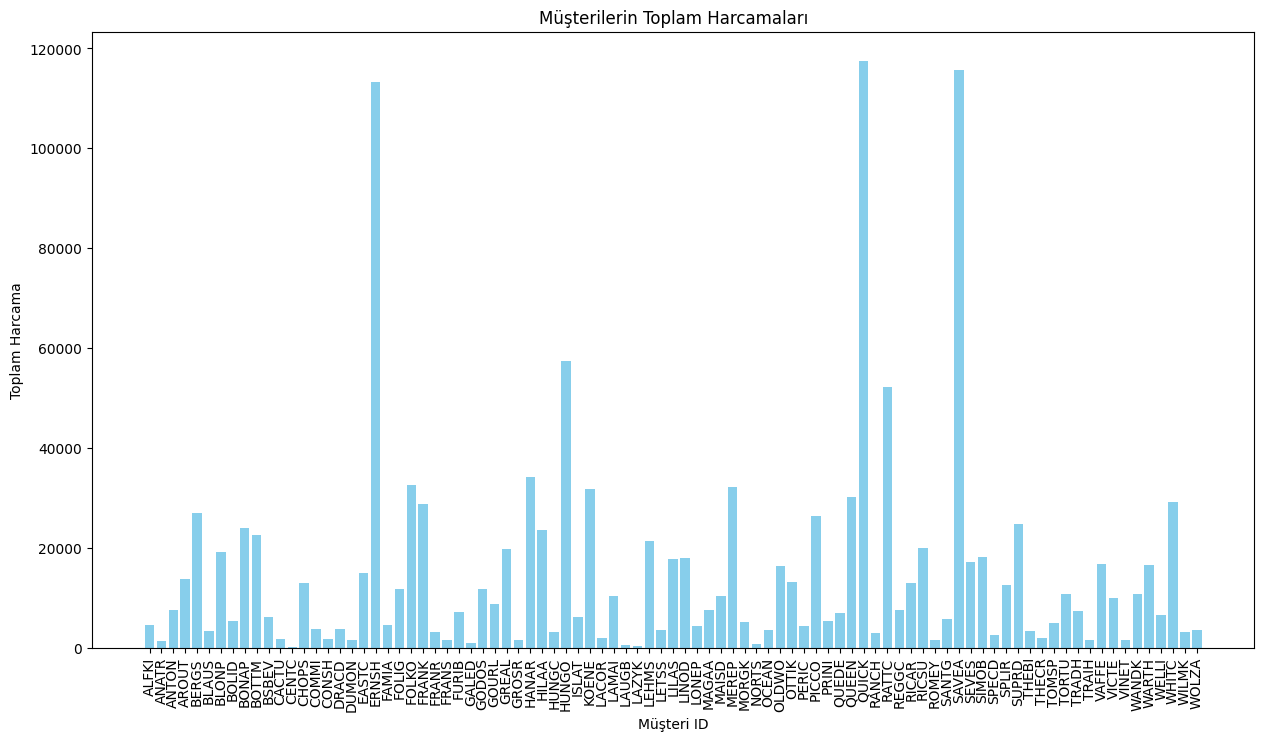

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasının yolunu belirtin
file_path = r'C:\Users\ilayd\OneDrive\Masaüstü\DataBase.xlsx'

excel_data = pd.read_excel(file_path, sheet_name=None)

# Toplam harcamaları saklamak için bir liste oluşturun
total_spending = []

# Her bir sayfayı ayrı bir DataFrame olarak işleyin
for sheet_name, df in excel_data.items():
    print(f"Sayfa Adı: {sheet_name}")
    print(df.head())  # Veri yapısını kontrol edin
    
    # Verilerde "CustomerID", "CompanyName", "TotalSpending" sütunları olup olmadığını kontrol et
    if 'CustomerID' in df.columns and 'TotalSpending' in df.columns:
        # Müşteri ID ve toplam harcamaları gruplandır ve toplam harcamaları hesapla
        grouped_df = df.groupby('CustomerID')['TotalSpending'].sum().reset_index()
        
        # Her müşteri için toplam harcamaları listeye ekle
        total_spending.append(grouped_df)
    
    else:
        print(f"Bu sayfada uygun sütunlar bulunamadı: {sheet_name}")

# Tüm sayfalardan gelen toplam harcamaları birleştirin
if total_spending:
    all_spending_df = pd.concat(total_spending)
    
    # Müşteriler bazında toplam harcamaları hesaplayın
    final_spending_df = all_spending_df.groupby('CustomerID')['TotalSpending'].sum().reset_index()
    
    # Sonuçları yazdırma
    print("\nToplam Harcamalar:")
    print(final_spending_df)
    
    # Görselleştirme
    plt.figure(figsize=(15, 8))
    plt.bar(final_spending_df['CustomerID'], final_spending_df['TotalSpending'], color='skyblue')
    plt.xlabel('Müşteri ID')
    plt.ylabel('Toplam Harcama')
    plt.title('Müşterilerin Toplam Harcamaları')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("Toplam harcamalar hesaplanamadı.")

Sayfa Adı: Tüm müşterilerin toplam harcama
  CustomerID                   CompanyName  TotalSpending
0      QUICK                    QUICK-Stop      117483.39
1      SAVEA            Save-a-lot Markets      115673.39
2      ERNSH                  Ernst Handel      113236.68
3      HUNGO  Hungry Owl All-Night Grocers       57317.39
4      RATTC    Rattlesnake Canyon Grocery       52245.90
Bu sayfada uygun sütunlar bulunamadı: Tüm müşterilerin toplam harcama
Sayfa Adı: En çok satan ürünler
   ProductID             ProductName  TotalQuantitySold
0         60       Camembert Pierrot               1577
1         59    Raclette Courdavault               1496
2         31       Gorgonzola Telino               1397
3         56  Gnocchi di nonna Alice               1263
4         16                 Pavlova               1158
Sayfa Adı: Her çalışanın işleme aldığı top
   EmployeeID       EmployeeName  TotalOrders  TotalSales
0           4  Peacock, Margaret          420   250187.45
1           

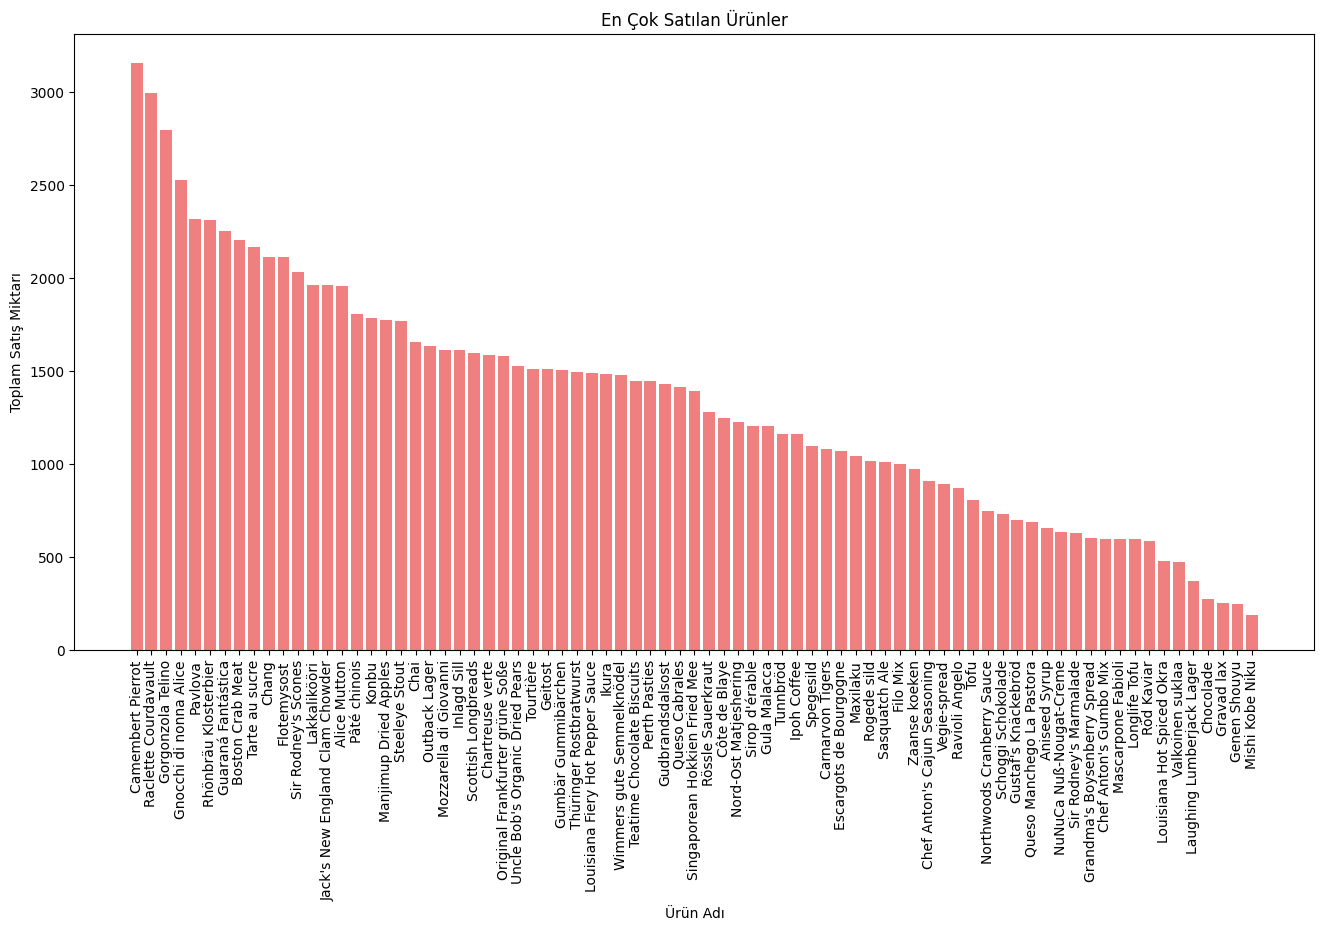

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasının yolunu belirtin
file_path = r'C:\Users\ilayd\OneDrive\Masaüstü\DataBase.xlsx'

# Excel dosyasındaki tüm sayfaları oku
excel_data = pd.read_excel(file_path, sheet_name=None)

# En çok satılan ürünleri saklamak için bir liste oluşturun
total_sales = []

# Her bir sayfayı ayrı bir DataFrame olarak işleyin
for sheet_name, df in excel_data.items():
    print(f"Sayfa Adı: {sheet_name}")
    print(df.head()) 
    
    # Verilerde "ProductID", "ProductName", "TotalQuantitySold" sütunları olup olmadığını kontrol et
    if 'ProductID' in df.columns and 'ProductName' in df.columns and 'TotalQuantitySold' in df.columns:
        # Ürünleri ve toplam satış miktarlarını gruplandır ve toplam satış miktarlarını hesapla
        grouped_df = df.groupby('ProductName')['TotalQuantitySold'].sum().reset_index()
        
        # Her ürün için toplam satışları listeye ekle
        total_sales.append(grouped_df)
    
    else:
        print(f"Bu sayfada uygun sütunlar bulunamadı: {sheet_name}")

# Tüm sayfalardan gelen toplam satışları birleştirin
if total_sales:
    all_sales_df = pd.concat(total_sales)
    
    # Ürünler bazında toplam satış miktarlarını hesaplayın
    final_sales_df = all_sales_df.groupby('ProductName')['TotalQuantitySold'].sum().reset_index()
    
    # Satış miktarına göre azalan sırada ürünleri sıralayın
    final_sales_df = final_sales_df.sort_values(by='TotalQuantitySold', ascending=False)
    
    # Sonuçları yazdırın
    print("\nEn Çok Satılan Ürünler:")
    print(final_sales_df)
    
    # Görselleştirme
    plt.figure(figsize=(16, 8))
    plt.bar(final_sales_df['ProductName'], final_sales_df['TotalQuantitySold'], color='lightcoral')
    plt.xlabel('Ürün Adı')
    plt.ylabel('Toplam Satış Miktarı')
    plt.title('En Çok Satılan Ürünler')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("En çok satılan ürünler hesaplanamadı.")

Sayfa Adı: Tüm müşterilerin toplam harcama
  CustomerID                   CompanyName  TotalSpending
0      QUICK                    QUICK-Stop      117483.39
1      SAVEA            Save-a-lot Markets      115673.39
2      ERNSH                  Ernst Handel      113236.68
3      HUNGO  Hungry Owl All-Night Grocers       57317.39
4      RATTC    Rattlesnake Canyon Grocery       52245.90
Bu sayfada uygun sütunlar bulunamadı: Tüm müşterilerin toplam harcama
Sayfa Adı: En çok satan ürünler
   ProductID             ProductName  TotalQuantitySold
0         60       Camembert Pierrot               1577
1         59    Raclette Courdavault               1496
2         31       Gorgonzola Telino               1397
3         56  Gnocchi di nonna Alice               1263
4         16                 Pavlova               1158
Bu sayfada uygun sütunlar bulunamadı: En çok satan ürünler
Sayfa Adı: Her çalışanın işleme aldığı top
   EmployeeID       EmployeeName  TotalOrders  TotalSales
0          

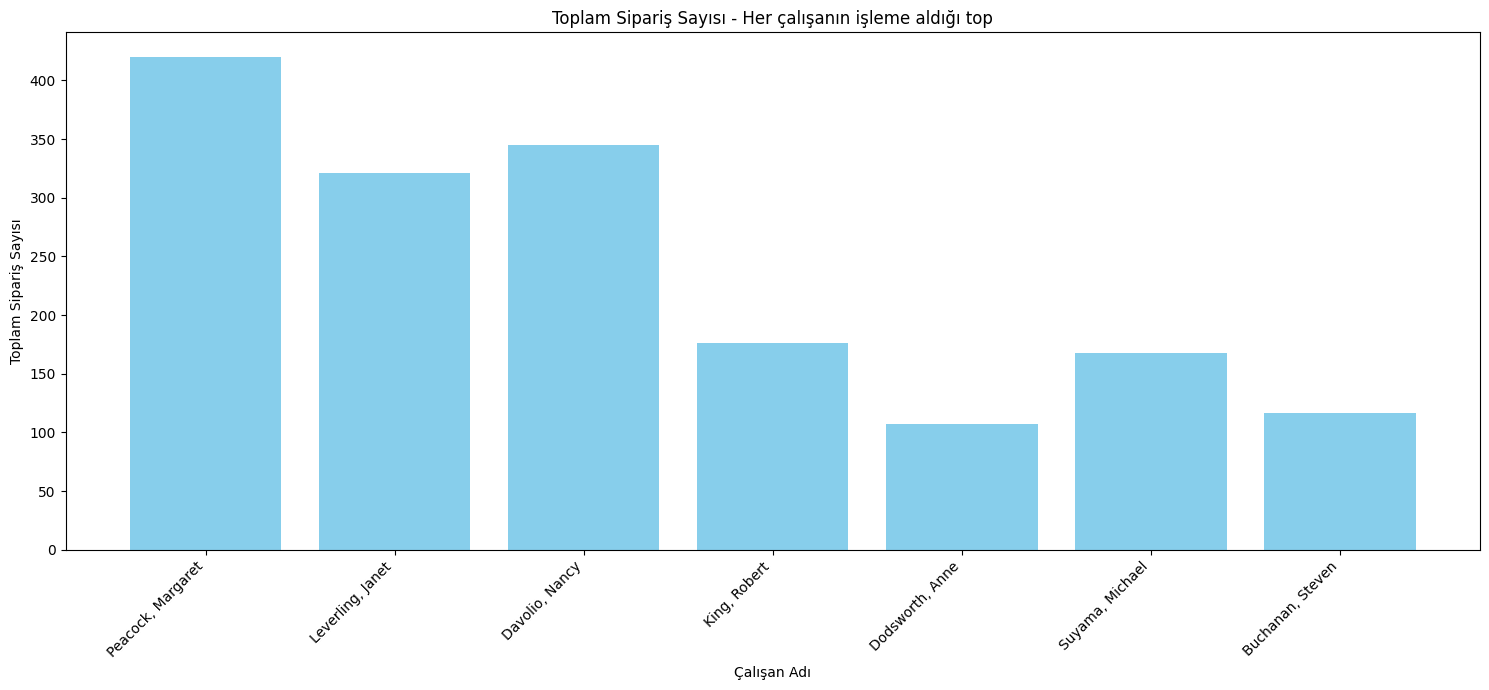

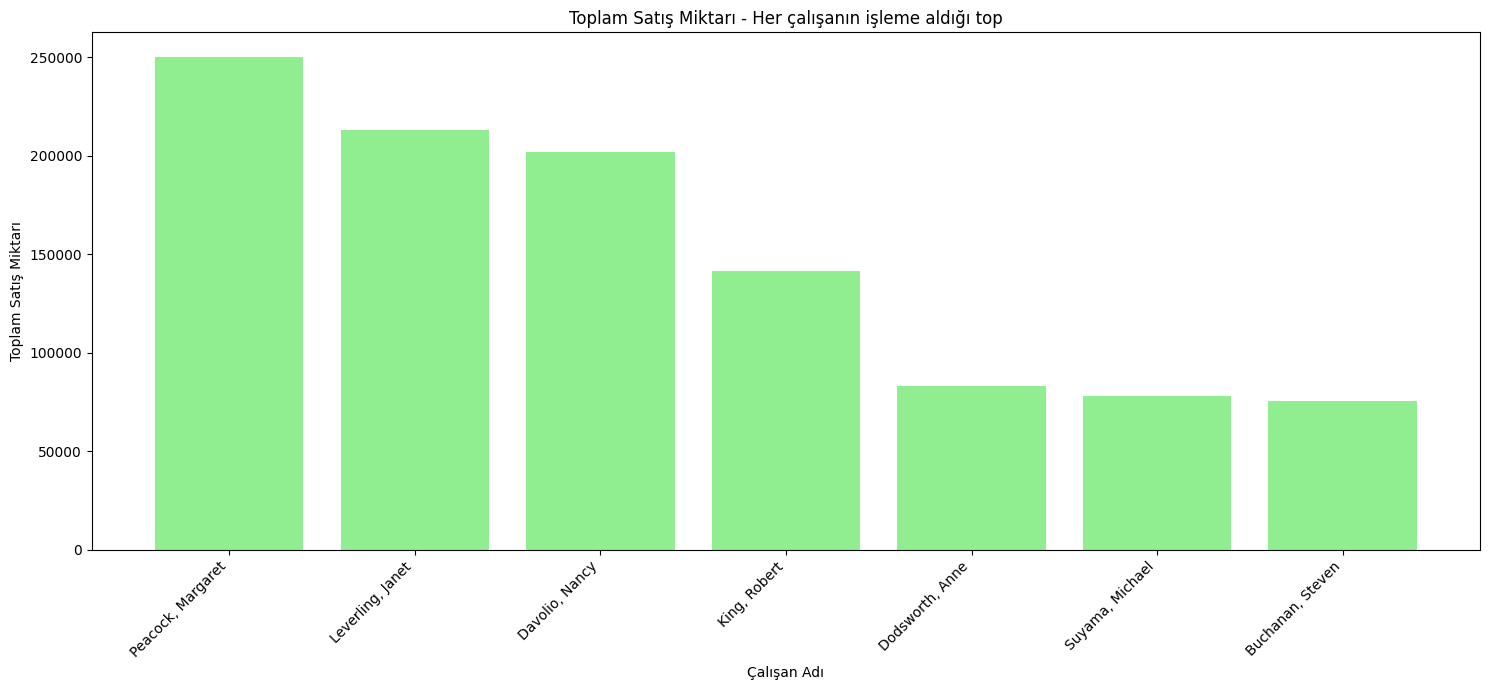

Sayfa Adı: Tedarikçiler tarafından alınan 
   SupplierID             SupplierName  ProductID             ProductName  \
0          28             Gai pâturage         60       Camembert Pierrot   
1          28             Gai pâturage         59    Raclette Courdavault   
2          14  Formaggi Fortini s.r.l.         31       Gorgonzola Telino   
3          26     Pasta Buttini s.r.l.         56  Gnocchi di nonna Alice   
4           7            Pavlova, Ltd.         16                 Pavlova   

   TotalQuantitySold  
0               1577  
1               1496  
2               1397  
3               1263  
4               1158  
Bu sayfada uygun sütunlar bulunamadı: Tedarikçiler tarafından alınan 


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasının yolunu belirtelim.
file_path = r'C:\Users\ilayd\OneDrive\Masaüstü\DataBase.xlsx'

# Excel dosyasındaki tüm sayfaları oku
excel_data = pd.read_excel(file_path, sheet_name=None)

# Her bir sayfayı ayrı bir DataFrame olarak işleyip ve görselleştirelim.
for sheet_name, df in excel_data.items():
    print(f"Sayfa Adı: {sheet_name}")
    print(df.head())  
    
    # "EmployeeID", "EmployeeName", "TotalOrders", "TotalSales" sütunlarının olup olmadığını kontrol edelim.
    if all(col in df.columns for col in ['EmployeeID', 'EmployeeName', 'TotalOrders', 'TotalSales']):
        
        # Toplam Sipariş Sayısını Görselleştir
        plt.figure(figsize=(15, 7))
        plt.bar(df['EmployeeName'], df['TotalOrders'], color='skyblue')
        plt.xlabel('Çalışan Adı')
        plt.ylabel('Toplam Sipariş Sayısı')
        plt.title(f'Toplam Sipariş Sayısı - {sheet_name}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()  # Etiketlerin kesilmemesi için
        plt.show()
        
        # Toplam Satış Miktarını Görselleştir
        plt.figure(figsize=(15, 7))
        plt.bar(df['EmployeeName'], df['TotalSales'], color='lightgreen')
        plt.xlabel('Çalışan Adı')
        plt.ylabel('Toplam Satış Miktarı')
        plt.title(f'Toplam Satış Miktarı - {sheet_name}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()  # Etiketlerin kesilmemesi için
        plt.show()
    
    else:
        print(f"Bu sayfada uygun sütunlar bulunamadı: {sheet_name}")

   SupplierID             SupplierName  ProductID             ProductName  \
0          28             Gai pâturage         60       Camembert Pierrot   
1          28             Gai pâturage         59    Raclette Courdavault   
2          14  Formaggi Fortini s.r.l.         31       Gorgonzola Telino   
3          26     Pasta Buttini s.r.l.         56  Gnocchi di nonna Alice   
4           7            Pavlova, Ltd.         16                 Pavlova   

   TotalQuantitySold  
0               1577  
1               1496  
2               1397  
3               1263  
4               1158  


C:\Users\ilayd\AppData\Local\Temp\ipykernel_13252\3310542914.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=supplier_sales, x='SupplierName', y='TotalQuantitySold', palette='viridis')


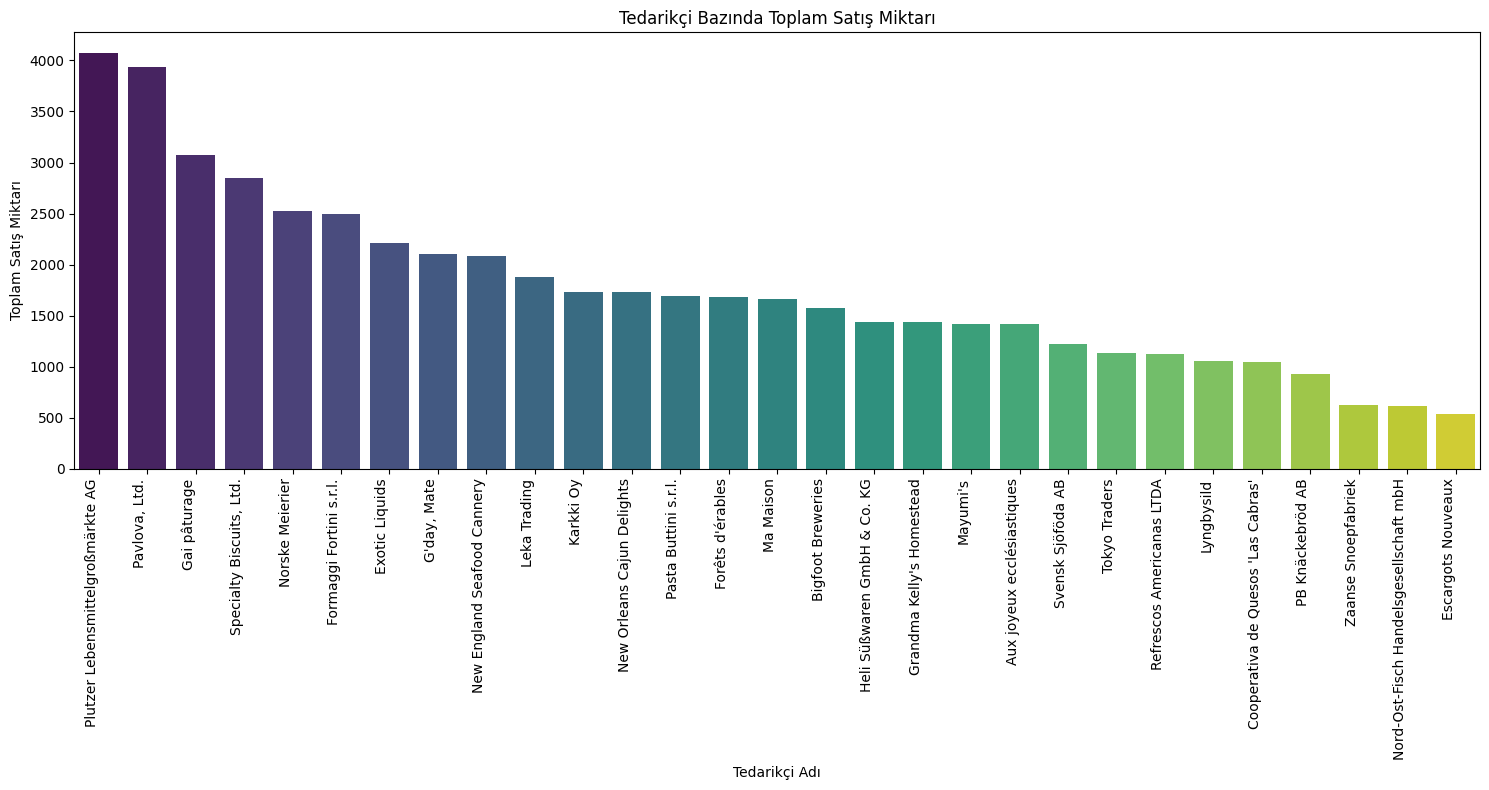

C:\Users\ilayd\AppData\Local\Temp\ipykernel_13252\3310542914.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_sales, x='ProductName', y='TotalQuantitySold', palette='magma')


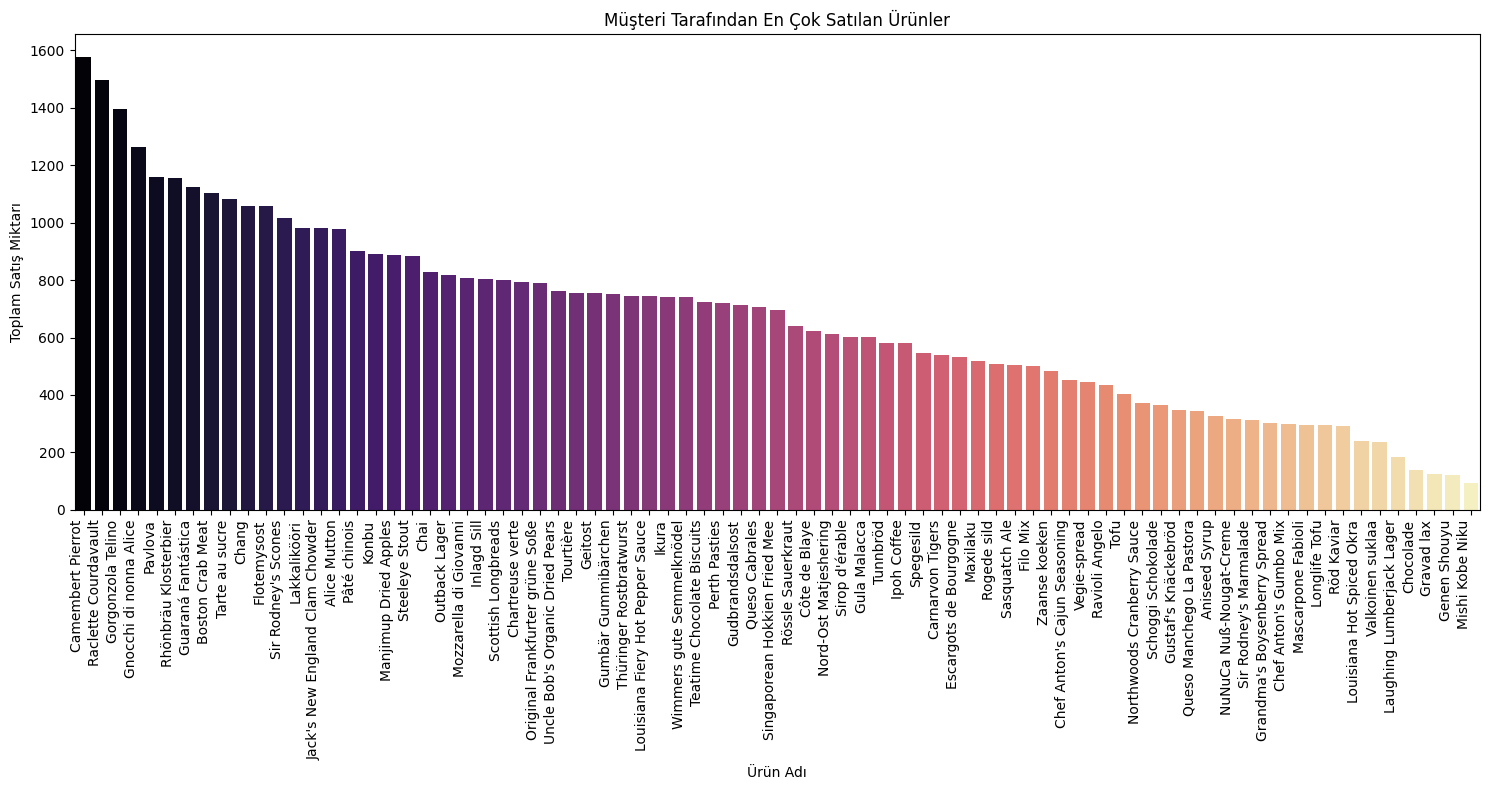

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Excel dosyasının yolunu belirtelim.
file_path = r'C:\Users\ilayd\OneDrive\Masaüstü\DataBase.xlsx'

# Sayfa adını doğru bir şekilde girin
sheet_name = 'Tedarikçiler tarafından alınan '  #Tedarikçilerden alınan ve ardından müşteri tarafından en çok satılan ürünler
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Verilerin başlıklarını kontrol edin
print(df.head())

# "SupplierID", "SupplierName", "ProductID", "ProductName", "TotalQuantitySold" sütunlarının olup olmadığını kontrol et
if all(col in df.columns for col in ['SupplierID', 'SupplierName', 'ProductID', 'ProductName', 'TotalQuantitySold']):
    
    # Tedarikçiler bazında toplam satış miktarlarını hesapla
    supplier_sales = df.groupby('SupplierName')['TotalQuantitySold'].sum().reset_index()
    supplier_sales = supplier_sales.sort_values(by='TotalQuantitySold', ascending=False)
    
    # Tedarikçi Bazında Toplam Satış Miktarını Görselleştir
    plt.figure(figsize=(15, 8))
    sns.barplot(data=supplier_sales, x='SupplierName', y='TotalQuantitySold', palette='viridis')
    plt.xlabel('Tedarikçi Adı')
    plt.ylabel('Toplam Satış Miktarı')
    plt.title('Tedarikçi Bazında Toplam Satış Miktarı')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Ürünler bazında toplam satış miktarlarını hesapla
    product_sales = df.groupby('ProductName')['TotalQuantitySold'].sum().reset_index()
    product_sales = product_sales.sort_values(by='TotalQuantitySold', ascending=False)
    
    # Ürün Bazında Toplam Satış Miktarını Görselleştir
    plt.figure(figsize=(15, 8))
    sns.barplot(data=product_sales, x='ProductName', y='TotalQuantitySold', palette='magma')
    plt.xlabel('Ürün Adı')
    plt.ylabel('Toplam Satış Miktarı')
    plt.title('Müşteri Tarafından En Çok Satılan Ürünler')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()
    
else:
    print("Bu sayfada uygun sütunlar bulunamadı.")